# Exercise 3

In [1]:
from Exercise3 import ICM,Block_ICM,evaluate_energy
from tsukuba_model import all_models
from tsukuba_visualize import to_image
import matplotlib.pyplot as plt
from grid import determine_grid
import numpy as np
import time

### Exercise 3.1

#### ICM
Type: Primal

Guarantees: None, but in each iteration the cost decreases

Complexity per iteration: O(N\*L) where N is the number of nodes and L is the number of labels. In each node it has to check all the labels and take the minimum

MODEL DOWN 32
(12, 9)
Objective cost= 363.0
Time elapsed 0.15729713439941406


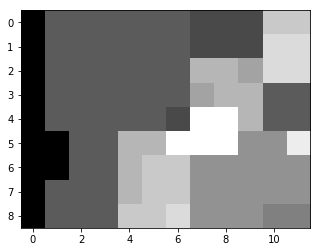

MODEL DOWN 16
(24, 18)
Objective cost= 1461.0
Time elapsed 0.5531857013702393


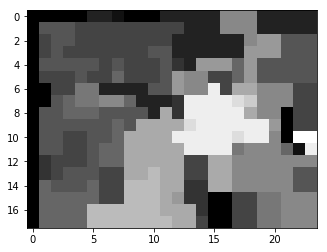

MODEL DOWN 8
(48, 36)
Objective cost= 4876.0
Time elapsed 4.582276821136475


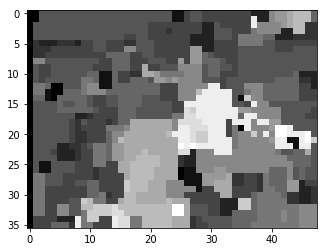

MODEL DOWN 4
(96, 72)
Objective cost= 16889.0
Time elapsed 16.519713640213013


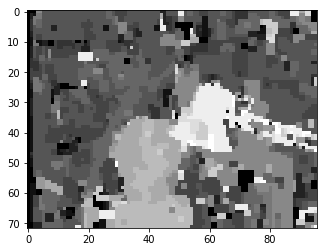

MODEL DOWN 2
(192, 144)
Objective cost= 62151.0
Time elapsed 85.20107340812683


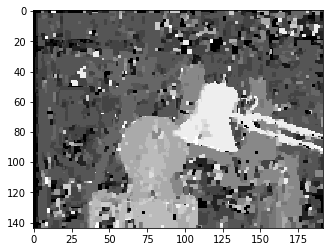

MODEL DOWN 1
(384, 288)
Objective cost= 255652.0
Time elapsed 354.08363032341003


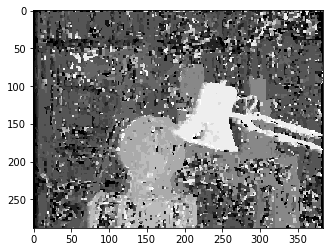

In [2]:

models=all_models()
count=0
for model in models:
    print('MODEL DOWN',2**(5-count))
    
    grid=determine_grid(model[0],model[1])
    start= time.time()
    assignment=ICM(grid)
    end= time.time()
    energy=evaluate_energy(grid._nodes, grid._edges, assignment)
    img_size=(12*(2**count),9*(2**count))
    print (img_size)
    print('Objective cost=',energy)
    print('Time elapsed', end-start)
    img=to_image(assignment,img_size)
    plt.imshow(np.asarray(img),cmap='gray')
    plt.show()
    count=count+1


#### BLOCK-ICM

Type: Primal

Guarantees: None, but in each iteration the cost decreases

Complexity per iteration: O(D\*(V\*L²)) where D is the number of subgraphs, V is the number of nodes per subgraph and L the number of labels. We use Dynamic Programming, which has a complexity O(V\*L²) to find the minimimum of a subgraph .

MODEL DOWN 32
(12, 9)
Objective cost= 323.0
Time elapsed 0.274233341217041


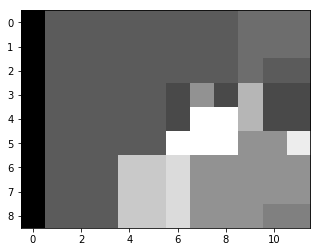

MODEL DOWN 16
(24, 18)
Objective cost= 1138.0
Time elapsed 2.0634210109710693


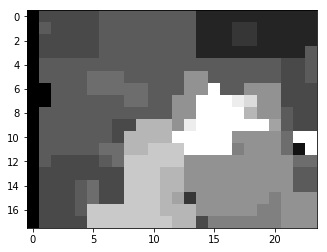

MODEL DOWN 8
(48, 36)
Objective cost= 3495.0
Time elapsed 6.675220489501953


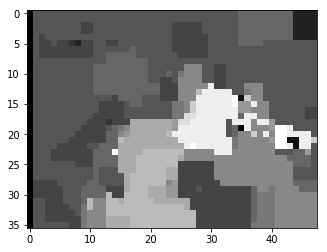

MODEL DOWN 4
(96, 72)
Objective cost= 11260.0
Time elapsed 31.1476891040802


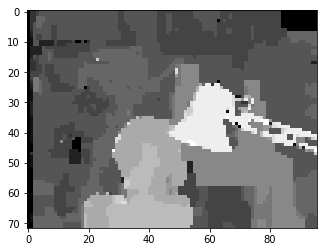

MODEL DOWN 2
(192, 144)
Objective cost= 36042.0
Time elapsed 418.8254551887512


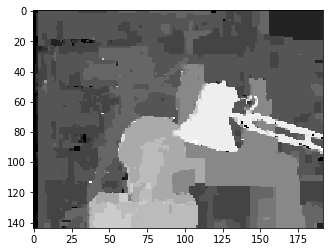

MODEL DOWN 1
(384, 288)
Objective cost= 136298.0
Time elapsed 2173.3464109897614


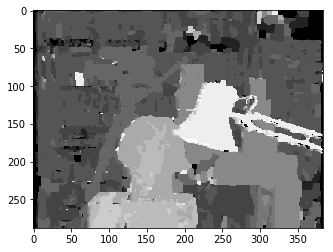

In [3]:

models=all_models()
count=0
for model in models:
    print('MODEL DOWN',2**(5-count))
    grid=determine_grid(model[0],model[1])
    start= time.time()
    assignment=Block_ICM(grid)
    end= time.time()
    energy=evaluate_energy(grid._nodes, grid._edges, assignment)
    img_size=(12*(2**count),9*(2**count))
    print (img_size)
    print('Objective cost=',energy)
    print('Time elapsed', end-start)
    img=to_image(assignment,img_size)
    plt.imshow(np.asarray(img),cmap='gray')
    plt.show()
    count=count+1


Comparing the results of ICM and Block-ICM, the first gives noisier outputs. Since Block-ICM minimizes a greater ser of nodes at the same time it can find an smoother and better optimal.